In [64]:
import pandas as pd
import lifelines
from lifelines import KaplanMeierFitter

print('lifelines version:', lifelines.__version__)

lifelines version: 0.24.0


In [65]:
# survival data obtained from the book
years = [4.07, 6.54, 1.39, 6.17, 5.89, 4.76, 3.67]
code  = [  1 ,  0  ,  1  ,  0  ,  1  ,  1  ,  0  ]

In [66]:
# we create a dataframe with those data
data = pd.DataFrame({'YEARS': years, 'CODE': code},)

In [45]:
data.sort_values(by='YEARS')

,YEARS,CODE
2,1.39,1
6,3.67,0
0,4.07,1
5,4.76,1
4,5.89,1
3,6.17,0
1,6.54,0


censored subjects are encoded 0, death events 1

In [69]:
# time to fit the data
kmf = KaplanMeierFitter()
kmf.fit(years, code)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 7 total observations, 3 right-censored observations>

Populating the interactive namespace from numpy and matplotlib


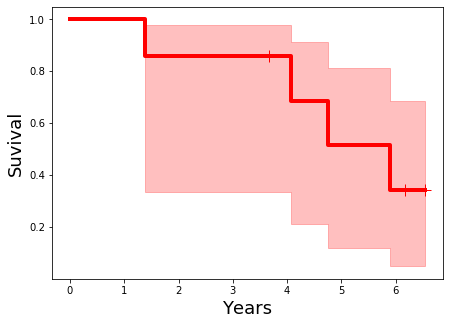

In [70]:
# let's see how it looks
%pylab inline
figsize(7,5)
kmf.plot(show_censors=True, legend=False,
        lw=4, c='red')
plt.xlabel('Years', fontsize=18)
plt.ylabel('Suvival', fontsize=18);

In [25]:
kmf._median

5.89

In [26]:
kmf.survival_function_

,KM_estimate
timeline,
0.00,1.000000
1.39,0.857143
3.67,0.857143
4.07,0.685714
4.76,0.514286
5.89,0.342857
6.17,0.342857
6.54,0.342857


In [71]:
# need to create new columns in order to prepare a lifelines Table
data['observed_deaths'] = data['CODE'] == 1
data['censored']       = data['CODE'] == 0

In [72]:
# Transforming survival-table data into lifelines format
from lifelines.utils import survival_events_from_table

data.set_index('YEARS', inplace=True)
T, E, W = survival_events_from_table(data, observed_deaths_col='observed_deaths', censored_col='censored')

In [55]:
from lifelines.utils import survival_table_from_events

table = survival_table_from_events(T, E)
display(table)

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.00,0,0,0,7,7
1.39,1,1,0,0,7
3.67,1,0,1,0,6
4.07,1,1,0,0,5
4.76,1,1,0,0,4
5.89,1,1,0,0,3
6.17,1,0,1,0,2
6.54,1,0,1,0,1


In [32]:
# how do we compute the fraction survival?
print(6/7)
print(4/5)
print(6/7*4/5)

0.8571428571428571
0.8
0.6857142857142857


In [67]:
# attempt to compute the CI...
from statsmodels.stats import proportion
conf_int = proportion.proportion_confint(6, 7, method='binom_test')
conf_int

(0.44576337872989324, 0.9926991680210083)

In [8]:
proportion.proportion_confint?

Signature: proportion.proportion_confint(count, nobs, alpha=0.05, method='normal')
Docstring:
confidence interval for a binomial proportion

Parameters
----------
count : int or array_array_like
    number of successes, can be pandas Series or DataFrame
nobs : int
    total number of trials
alpha : float in (0, 1)
    significance level, default 0.05
method : {'normal', 'agresti_coull', 'beta', 'wilson', 'binom_test'}
    default: 'normal'
    method to use for confidence interval,
    currently available methods :

     - `normal` : asymptotic normal approximation
     - `agresti_coull` : Agresti-Coull interval
     - `beta` : Clopper-Pearson interval based on Beta distribution
     - `wilson` : Wilson Score interval
     - `jeffreys` : Jeffreys Bayesian Interval
     - `binom_test` : experimental, inversion of binom_test

Returns
-------
ci_low, ci_upp : float, ndarray, or pandas Series or DataFrame
    lower and upper confidence level with coverage (approximately) 1-alpha.
    When 

In [27]:
# calculating the 95% CI using the Wald method (see Intuitive Biostatistics 4th page39)
p = (6+2)/(7+4)
W = 2 * (p*(1-p)/(7+4))**.5

In [34]:
print(f"CI = [{p-W,p+W}]")

CI = [(0.45870947422691044, 0.9958359803185441)]


It looks like the method used to compute the CI for survival function is different from the Ward method applied to proportions. See [Lifelines documentations](https://lifelines.readthedocs.io/en/latest/index.html) for more details (it is more complex than at the first sight ;-)